In [ ]:
from openseespy.opensees import *

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Start of model generation
# -----------------------------

# remove existing model
wipe()

# set modelbuilder
model('basic', '-ndm', 2, '-ndf', 2)

# create nodes
node(1, 0.0, 0.0)
node(2, 144.0,  0.0)
node(3, 168.0,  0.0)
node(4,  72.0, 96.0)

# set boundary condition
fix(1, 1, 1)
fix(2, 1, 1)
fix(3, 1, 1)

# define materials
uniaxialMaterial("Elastic", 1, 3000.0)

# define elements
element("Truss",1,1,4,10.0,1)
element("Truss",2,2,4,5.0,1)
element("Truss",3,3,4,5.0,1)

# create TimeSeries
timeSeries("Linear", 1)

# create a plain load pattern
pattern("Plain", 1, 1)

# Create the nodal load - command: load nodeID xForce yForce
load(4, 100.0, -50.0)

# ------------------------------
# Start of analysis generation
# ------------------------------

# create SOE
system("BandSPD")

# create DOF number
numberer("RCM")

# create constraint handler
constraints("Plain")

# create integrator
integrator("LoadControl", 1.0)

# create algorithm
algorithm("Linear")

# create analysis object
analysis("Static")

# perform the analysis
analyze(1)

ux = nodeDisp(4,1)
uy = nodeDisp(4,2)
if abs(ux-0.53009277713228375450)<1e-12 and abs(uy+0.17789363846931768864)<1e-12:
    print("Passed!")
else:
    print("Failed!")

In [1]:
from openseespy import opensees as ops
from openseespy.postprocessing import ops_vis as vis 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
ops.model('basicBuilder', '-ndm', 2, '-ndf', 3)

In [4]:
ops.node(1, 0.0, 0.0)
ops.node(2, 144.0,  0.0)
ops.node(3, 168.0,  0.0)
ops.node(4,  72.0, 96.0)

In [5]:
ops.fix(1, 1, 1, 1)
ops.fix(2, 1, 1, 1)
ops.fix(3, 1, 1, 1)

In [6]:
# define materials
ops.uniaxialMaterial("Elastic", 1, 3000.0)

# define elements
ops.element("Truss",1,1,4,10.0,1)
ops.element("Truss",2,2,4,5.0,1)
ops.element("Truss",3,3,4,5.0,1)

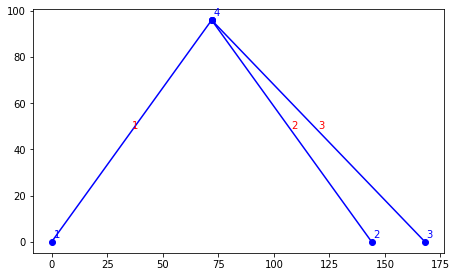

In [7]:
vis.plot_model()

In [8]:
# create TimeSeries
ops.timeSeries("Linear", 1)

# create a plain load pattern
ops.pattern("Plain", 1, 1)

# Create the nodal load - command: load nodeID xForce yForce
ops.load(4, 100.0, -50.0)

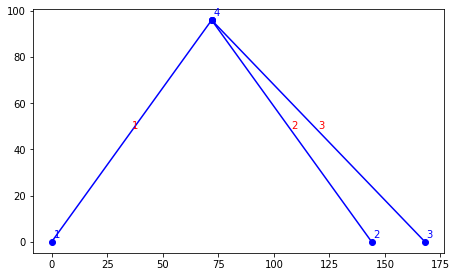

In [9]:
vis.plot_model()


In [10]:

# ------------------------------
# Start of analysis generation
# ------------------------------

# create SOE
ops.system("BandSPD")

# create DOF number
ops.numberer("RCM")

# create constraint handler
ops.constraints("Plain")

# create integrator
ops.integrator("LoadControl", 1.0)

# create algorithm
ops.algorithm("Linear")

# create analysis object
ops.analysis("Static")


In [11]:
# perform the analysis
ops.analyze(1)

Node::addunbalLoad - load to add of incorrect size 2 should be 3
WARNING BandSPDLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at iteration: 0 with domain at load factor 1
Node::addunbalLoad - load to add of incorrect size 2 should be 3
OpenSees > analyze failed, returned: -3 error flag


-3

200

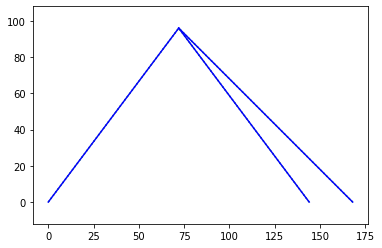

In [14]:
vis.plot_defo(sfac=200)

In [18]:
vis.plot_stress_2d(3, 0)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>